<a href="https://colab.research.google.com/github/mahad-asim76/Data/blob/master/Coin_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

In [124]:
import math
import yfinance as yf
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default="colab"
from datetime import date, timedelta
today = date.today()

In [3]:
d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=1521)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

In [10]:
df = yf.download('BTC-USD', start=start_date, end=end_date, progress=False)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-10-26,6468.439941,6498.290039,6449.609863,6474.750000,6474.750000,3306050000
2018-10-27,6480.839844,6507.410156,6453.529785,6480.379883,6480.379883,3393250000
2018-10-28,6482.660156,6502.279785,6447.910156,6486.390137,6486.390137,3445190000
2018-10-29,6492.350098,6503.600098,6306.990234,6332.629883,6332.629883,4199910000
2018-10-30,6337.040039,6364.990234,6310.140137,6334.270020,6334.270020,3781100000


In [11]:
df.shape

(1521, 6)

In [127]:
trace1 = go.Scatter(
    x = df['Open'].index,
    y = df['Open'].astype(float),
    mode = 'lines',
    name = 'Open'
)

trace2 = go.Scatter(
    x = df['Close'].index,
    y = df['Close'].astype(float),
    mode = 'lines',
    name = 'Close'
)
trace3 = go.Scatter(
    x = df['High'].index,
    y = df['High'].astype(float),
    mode = 'lines',
    name = 'High'
)

layout = dict(
    title='Historical Bitcoin Prices with the Slider ',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(count=12,
                     label='1y',
                     step='month',
                     stepmode='backward'),
                dict(count=36,
                     label='3y',
                     step='month',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible = True
        ),
        type='date'
    )
)

Data = [trace1, trace2, trace3]
fig = dict(data=Data, layout=layout)
iplot(fig, filename = "Time Series with Rangeslider")

In [13]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset) * .8) # We are using %80 of the data for training
training_data_len

1217

In [21]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [17]:
# Create the training dataset
train_data = scaled_data[0:training_data_len, :]
X_train = []
y_train = []
for i in range(60, len(train_data)):
  X_train.append(train_data[i-60: i, 0])
  y_train.append(train_data[i, 0])
  if i <= 60:
    print(X_train)
    print(y_train)

[array([5.03339801e-02, 5.04214957e-02, 5.05149240e-02, 4.81247469e-02,
       4.81502426e-02, 4.78912632e-02, 4.88265945e-02, 4.89923048e-02,
       4.85697936e-02, 4.88009470e-02, 4.94776178e-02, 5.01203905e-02,
       5.11950104e-02, 5.00070756e-02, 4.89484711e-02, 4.93153307e-02,
       4.93471945e-02, 4.87254013e-02, 4.85422865e-02, 3.88867682e-02,
       3.74827542e-02, 3.63560652e-02, 3.60262081e-02, 3.71020652e-02,
       2.54115782e-02, 1.88886545e-02, 2.12250395e-02, 1.75528845e-02,
       1.72601741e-02, 1.00108445e-02, 1.20193915e-02, 8.43102136e-03,
       9.07753224e-03, 1.58659591e-02, 1.61990344e-02, 1.21328467e-02,
       1.52014480e-02, 1.40387887e-02, 1.02186921e-02, 1.11943314e-02,
       8.04030189e-03, 4.42001857e-03, 2.84743274e-03, 3.72070232e-03,
       5.86774859e-03, 4.13328171e-03, 2.91972986e-03, 3.88913755e-03,
       1.19563886e-03, 8.89653136e-05, 0.00000000e+00, 2.49920348e-04,
       4.80495427e-03, 7.13969982e-03, 7.91525632e-03, 1.39542789e-02,
     

In [18]:
# Convert the X_train and y_train to numpy array
X_train, y_train = np.array(X_train), np.array(y_train)

In [19]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1)) # we make it like pros. it wanna say "np.reshape(X_train, (2083, 60, 1))"
X_train.shape

(1157, 60, 1)

In [22]:
test_data = scaled_data[training_data_len - 60 : , :]
#Create the data sets X_test and y_test
X_test = []
y_test = dataset[training_data_len : , :]
for i in range(60, len(test_data)):
  X_test.append(test_data[i-60 : i, 0])

In [23]:
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [24]:
# Build LSTM Model
model_1 = Sequential()
model_1.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model_1.add(LSTM(50, return_sequences=False))
model_1.add(Dense(25))
model_1.add(Dense(1))

In [26]:
# Compile the model
model_1.compile(optimizer='adam', loss='mse')
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)
history = model_1.fit(X_train, y_train, batch_size=1, epochs=10)

Epoch 1/10
1157/1157 [==============================] - 36s 28ms/step - loss: 6.7096e-04
Epoch 2/10
1157/1157 [==============================] - 34s 29ms/step - loss: 5.5018e-04
Epoch 3/10
1157/1157 [==============================] - 33s 28ms/step - loss: 6.0973e-04
Epoch 4/10
1157/1157 [==============================] - 33s 28ms/step - loss: 6.4450e-04
Epoch 5/10
1157/1157 [==============================] - 33s 29ms/step - loss: 5.7298e-04
Epoch 6/10
1157/1157 [==============================] - 33s 28ms/step - loss: 5.7056e-04
Epoch 7/10
1157/1157 [==============================] - 34s 29ms/step - loss: 5.8358e-04
Epoch 8/10
1157/1157 [==============================] - 33s 28ms/step - loss: 5.5981e-04
Epoch 9/10
1157/1157 [==============================] - 32s 28ms/step - loss: 5.6647e-04
Epoch 10/10
1157/1157 [==============================] - 33s 28ms/step - loss: 5.5253e-04


In [27]:
# Get the model_1 predicted price values 
predictions_1 = model_1.predict(X_test)
predictions_1 = scaler.inverse_transform(predictions_1)
len(predictions_1)

10/10 [==============================] - 4s 27ms/step


304

In [49]:
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error 
svc_accuracy = mean_absolute_error(y_test, predictions_1)
svc_accuracy_per = mean_absolute_percentage_error(y_test, predictions_1)
print(100-svc_accuracy_per)

99.96727144640695


<ipython-input-32-a83087a50079>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_1['Predictions'] = predictions_1


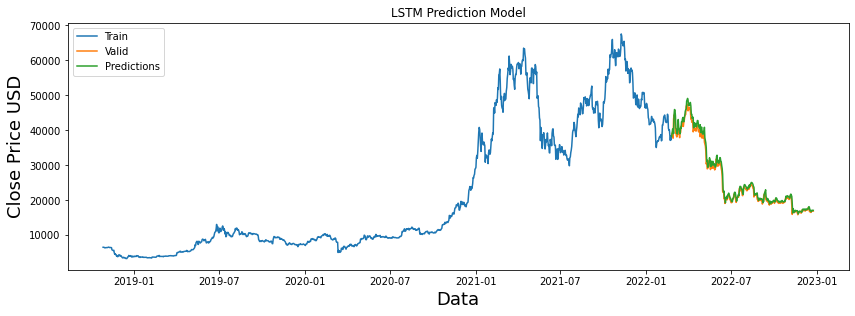

In [32]:
# Plot the data
train = data[:training_data_len]
valid_1 = data[training_data_len:]
valid_1['Predictions'] = predictions_1
plt.figure(figsize=(14, 10))
plt.subplot(2, 1, 1)
plt.title('LSTM Prediction Model')
plt.xlabel('Data', fontsize=18)
plt.ylabel('Close Price USD', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid_1[['Close', 'Predictions']])
plt.legend(['Train', 'Valid', 'Predictions'], loc='upper left')
plt.show()

In [ ]:
#Get the last 60 day closing price values and convert the datadrame to an array
last_60_days = data[-60:].values
# Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.fit_transform(last_60_days)
# create an empty list
new_X_test = []
# Append the past 60 days
new_X_test.append(last_60_days_scaled)
# Convert the X_test data set to a numpy array
new_X_test = np.array(new_X_test)
# Reshape the data 
new_X_test = np.reshape(new_X_test, (new_X_test.shape[1], new_X_test.shape[0], 1))
# Get the predicted scaled price
pred_price = model_1.predict(new_X_test)
# Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
pred_price = np.array(pred_price)

In [121]:
df_total = pd.DataFrame(valid_1)

<class 'pandas.core.frame.DataFrame'>


In [120]:
trace1 = go.Scatter(
    x = df_total['Date'],
    y =  df_total['Close'],
    mode = 'lines',
    name = 'Training'
)

trace2 = go.Scatter(
    x = df_total['Date'],
    y = df_total['Predictions'],
    mode = 'lines',
    name = 'Predicted Using LSTM'
)
Data = [trace1, trace2]
fig = dict(data=Data)
iplot(fig, filename = "Time Series with Rangeslider")

In [133]:
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, accuracy_score 
Mae_accuracy = mean_absolute_error(y_test, predictions_1)
mape_accuracy_per = mean_absolute_percentage_error(y_test, predictions_1)
rmse = np.sqrt(np.mean(predictions_1 - y_test)**2)
print("Root Mean Square Error: ", rmse)
print("MAE: ", Mae_accuracy)
print("Accuracy Score: ", 100-mape_accuracy_per)

Root Mean Square Error:  691.0271253083881
MAE:  890.5247995476974
Accuracy Score:  99.96727144640695


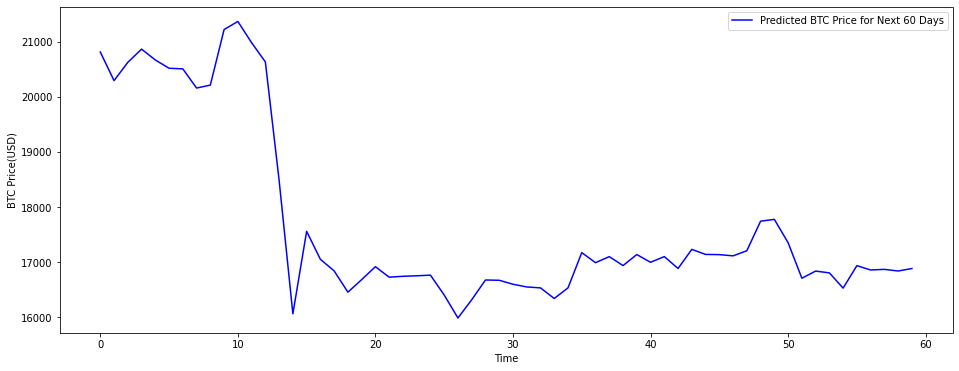

In [101]:
plt.figure(figsize=(16, 6))
plt.plot(pred_price[:, 0], color = 'blue', label = 'Predicted BTC Price for Next 60 Days')
plt.xlabel('Time')
plt.ylabel('BTC Price(USD)')
plt.legend(loc = 'best')
plt.show()